# GMIT 52446 Fundamentals of Data Analysis - Mark Kelly
# Assignment 1 - Anscombe's Quartet



## Problem statement
The following assignment concerns the well-known Anscombe’s quartet dataset. You
are required to create a Jupyter notebook analysing the dataset. There are four
distinct tasks to be carried out in your Jupyter notebook.
1. Explain the background to the dataset – who created it, when it was created, and
any speculation you can find regarding how it might have been created.
2. Plot the interesting aspects of the dataset.
3. Calculate the descriptive statistics of the variables in the dataset.
4. Explain why the dataset is interesting, referring to the plots and statistics above.

## 1 - Explain the background

<img src="Francis_Anscombe.jpeg",width=180,height=400, align=left>

Francis Anscombe was a English statistician who created 4 datasets in 1973 that came to be known as Anscombes Quartet.
It was developed to show the importance of both numerical and graphical analysis when dealing with datasets. It is unknown  exactly how Anscombe constructed the dataset.

## 2 - Dataset Plots

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline
import seaborn as sns
sns.set(style="ticks")
import numpy as np

The Anscombe dateset can be imported directly using the seaborn package.

In [3]:
df = sns.load_dataset("anscombe")
print(df)

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

### Plot 1

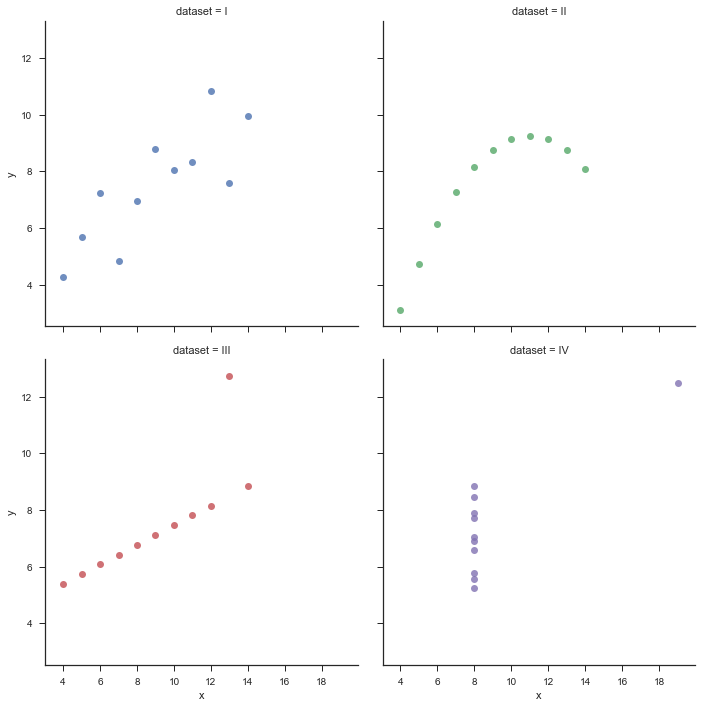

In [4]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df, col_wrap=2, fit_reg=False)

### Plot 2

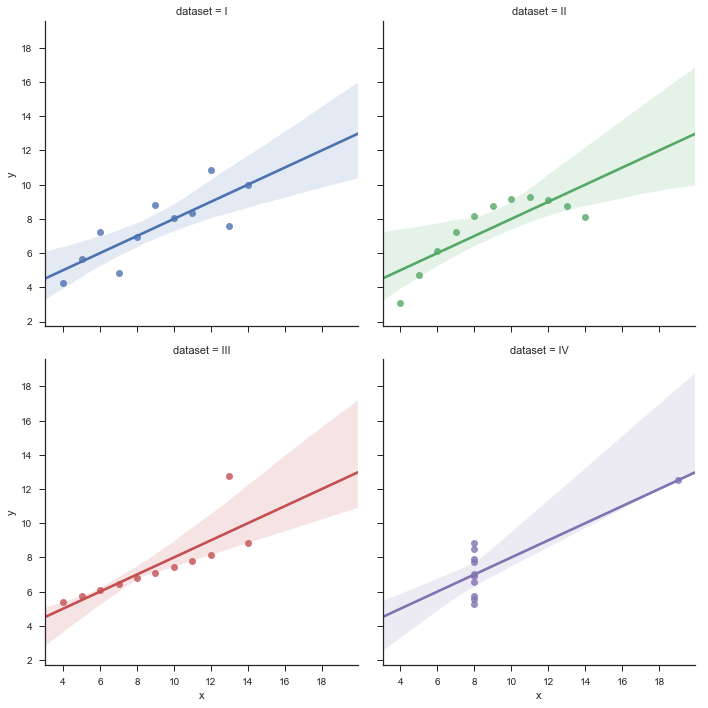

In [5]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df, col_wrap=2)

In [6]:
I = df.loc[df.dataset == "I"]
II = df.loc[df.dataset == "II"]
III = df.loc[df.dataset == "III"]
IV = df.loc[df.dataset == "IV"]

## Correlation coefficients


[[ 1.   1.   1.  -0.5]
 [ 1.   1.   1.  -0.5]
 [ 1.   1.   1.  -0.5]
 [-0.5 -0.5 -0.5  1. ]]


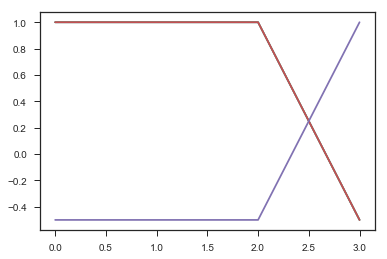

In [42]:
testX = np.corrcoef([I.x, II.x, III.x, IV.x])
plt.plot(testX)
print(testX)
plt.show()

[[ 1.          0.7500054   0.46871668 -0.48911622]
 [ 0.7500054   1.          0.58791933 -0.47809485]
 [ 0.46871668  0.58791933  1.         -0.15547179]
 [-0.48911622 -0.47809485 -0.15547179  1.        ]]


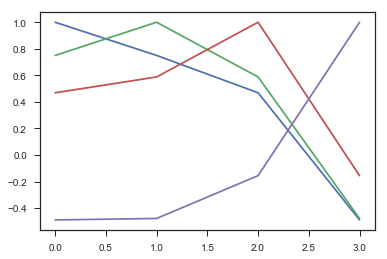

In [41]:
testY = np.corrcoef([I.y, II.y, III.y, IV.y])
print(testY)
plt.plot(testY)
plt.show()

[[ 1.          0.81636624]
 [ 0.81636624  1.        ]]


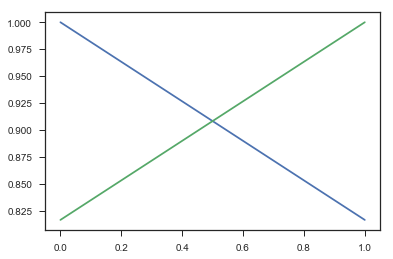

In [40]:
testall = np.corrcoef(df.x, df.y)
print(testall)
plt.plot(testall)
plt.show()

## 3 - Descriptive Statistics

In [75]:
grouped = df.groupby('dataset')
grouped.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [44]:
np.polyfit(I.x, I.y, 1)

array([ 0.50009091,  3.00009091])

In [45]:
np.polyfit(II.x, II.y, 1)

array([ 0.5       ,  3.00090909])

In [46]:
np.polyfit(III.x, III.y, 1)

array([ 0.49972727,  3.00245455])

In [47]:
np.polyfit(IV.x, IV.y, 1)

array([ 0.49990909,  3.00172727])

In [83]:
df.groupby('dataset').sum()

,x,y
dataset,,
I,99.0,82.51
II,99.0,82.51
III,99.0,82.50
IV,99.0,82.51


In [84]:
df.groupby('dataset').var()

,x,y
dataset,,
I,11.0,4.127269
II,11.0,4.127629
III,11.0,4.122620
IV,11.0,4.123249


## 4 - Dataset Explanation

Looking the first plot, we see 4 plots of data that look pretty unsimilar. Dataset 1 appears to be a scatter plot that is rising. Dataset 2 is a curve that rises and then falls. Dataset 3 is a line rising upwards with 1 outlier point. Finally  Dataset 4 is a line rising straight up also with an outlier point. Initial review of the plots don't seem to indicate any correlation between these datasets. 

If we plot a linear regression line for each dataset, see Plot 2, we notice something interesting. The line is nearly identical for each dataset.
When reviewing the  results in the Descriptive Statistics section, it can be seen that the mean and standard deviation for all four datasets are nearly identical for both the x and y values. This is not something that would be easily gained from the initial plots. The sum and variance for all datasets are again nearly identical in the x and y values.

When we calculate the correlation of the x values we see a high degree of correlation between the first 3 datasets. This is not surprising as the values for these 3 sets are identical. The 4 set of x values has a correlation coefficient of -0.5 which indicates a negative correlation. The correlation between the y datasets is much more varied than the x.
The overal correlation between all x and y values is 0.816 which shows a high degree of correlation.

We can use the numpy function 'polyfit' to calculate the linear regression values for each data set. The results for each set are nearly identical which can be seen in Plot 2. 

The main idea to take away from this dataset is that it's equally import to understand the numerical and graphical attributes of different datasets. Each method can give unique insights and understandings that the other may not provide.